In [15]:
# Originally from: https://towardsdatascience.com/stable-diffusion-using-hugging-face-501d8dbdd8
# CLIP VIT Large Patch 14: https://huggingface.co/openai/clip-vit-large-patch14
from transformers import CLIPTextModel, CLIPTokenizer

## Initiating tokenizer and encoder.
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14")

In [16]:
# How a prompt is encoded

prompt = ["a photo of a tyrannosaurus rex, in a field, with a cat"]
token = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
print(token.input_ids.shape)
token.input_ids

for t in list(token.input_ids[0,:20]): 
    print(f"{t}:{tokenizer.convert_ids_to_tokens(int(t))}")

torch.Size([1, 77])
49406:<|startoftext|>
320:a</w>
1125:photo</w>
539:of</w>
320:a</w>
46921:tyran
578:no
22118:saurus</w>
10904:rex</w>
530:in</w>
320:a</w>
1570:field</w>
593:with</w>
320:a</w>
2368:cat</w>
49407:<|endoftext|>
49407:<|endoftext|>
49407:<|endoftext|>
49407:<|endoftext|>
49407:<|endoftext|>


In [20]:
import numpy as np
input_ids_on_device = token.input_ids.to("cpu")

emb = text_encoder(input_ids_on_device)

# Convert embeddings to numpy array and round the values
embeddings = emb.last_hidden_state.detach().numpy()
rounded_embeddings = np.round(embeddings, decimals=5)

# Set print options to display the entire array
# np.set_printoptions(threshold=np.inf) # if you want to see the whole array uncomment this line

# Print the rounded embeddings
print(rounded_embeddings)


[[[-3.883800e-01  2.294000e-02 -5.220000e-02 -1.840600e-01 -2.732000e-02
   -3.355500e-01 -1.758000e-02 -1.869300e-01  1.877100e-01 -9.066000e-02
   -2.280100e-01 -1.497000e-01 -7.411000e-02 -3.546900e-01  1.134400e-01
   -1.016500e-01 -1.197800e-01 -1.001900e-01  4.472000e-02 -2.809122e+01
   -1.401900e-01 -1.786800e-01 -8.487000e-02 -9.500000e-02 -8.986000e-02
   -1.087500e-01 -1.839200e-01 -1.816400e-01 -3.113200e-01 -4.149000e-02
   -9.220000e-03 -4.834000e-02 -1.145600e-01 -6.755000e-02 -2.142300e-01
   -3.337300e-01 -3.739500e-01 -1.396600e-01 -5.302000e-02  3.969000e-02
   -1.552700e-01 -1.599900e-01 -1.629500e-01 -1.899400e-01 -1.639400e-01
   -3.056200e-01  3.779000e-02 -1.530200e-01 -3.526300e-01 -1.435800e-01
   -1.592000e-02 -9.637000e-02 -2.954900e-01 -1.094300e-01 -3.161100e-01
   -3.133000e-01  1.830000e-03 -1.464800e-01 -3.053400e-01  8.399000e-02
    1.664000e-02 -8.015000e-02 -1.835600e-01 -2.302300e-01 -2.472400e-01
   -2.537000e-01 -3.635300e-01 -2.873700e-01 -1.657

👇 This is all generated via ChatGPT unsure if correct

Original shape: (1, 77, 768)
Reshaped for PCA: (77, 768)


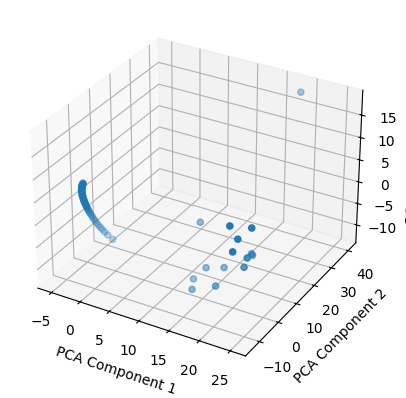

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'embeddings' is your high-dimensional data from the CLIP model
# Convert embeddings to numpy array
embeddings = emb.last_hidden_state.detach().numpy()

# Check the shape of the embeddings
print("Original shape:", embeddings.shape)

# Ensure embeddings are in the format (n_samples, n_features)
# If not, reshape accordingly
# For example, if embeddings.shape is (1, n_tokens, n_features):
if len(embeddings.shape) == 3:
    n_samples, n_tokens, n_features = embeddings.shape
    embeddings_reshaped = embeddings.reshape(n_samples * n_tokens, n_features)
else:
    embeddings_reshaped = embeddings

print("Reshaped for PCA:", embeddings_reshaped.shape)

# Apply PCA to reduce dimensions to 3
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings_reshaped)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the first three PCA components
ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2])

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.show()
